##  Problem statement

#### SALES PREDICTION USING PYTHON
- Sales prediction involves forecasting the amount of a product that customers will purchase, taking into account various factors such as advertising expenditure, target audience segmentation, and advertising platform selection. 
- In businesses that offer products or services, the role of a Data Scientist is crucial for predicting future sales. They utilize machine learning techniques in Python to analyze and interpret data, allowing them to make informed decisions regarding advertising costs. By leveraging these predictions, businesses can optimize their advertising strategies and maximize sales potential. Let's embark on the journey of sales prediction using machine learning in Python

## Import Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Load the data

In [2]:
data= pd.read_csv("Advertising.csv")
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
data.shape

(200, 4)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Data Cleaning & Data Preprocessing & Data visulization

In [6]:
# Check the Missing values
data.isnull().sum()          # There are no NULL values in the dataset, hence it is clean.

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

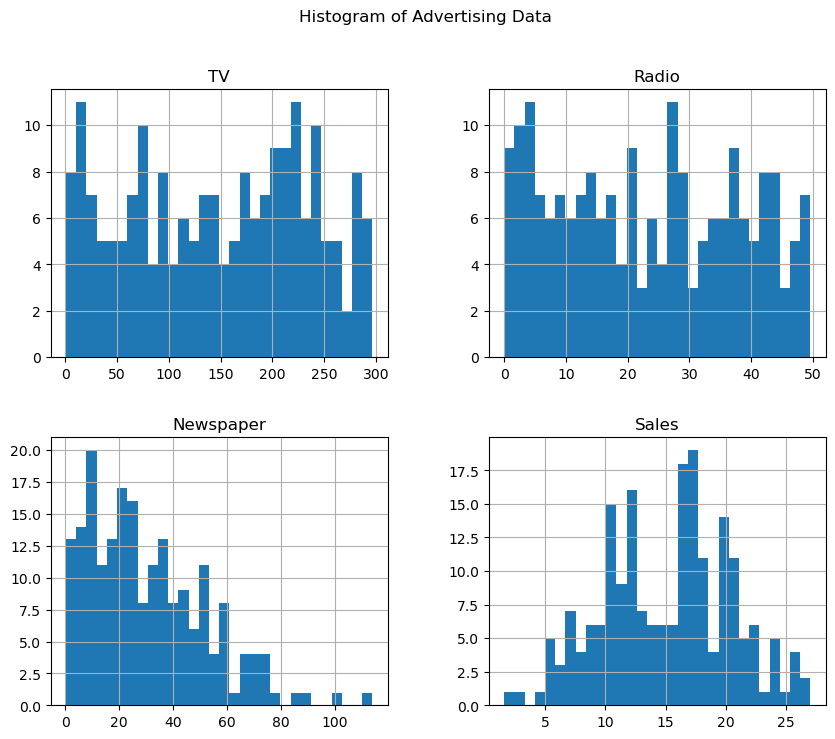

In [7]:
# Histograms:
# To understand the distribution of individual features.

data.hist(bins=30, figsize=(10, 8))
plt.suptitle('Histogram of Advertising Data')
plt.show()

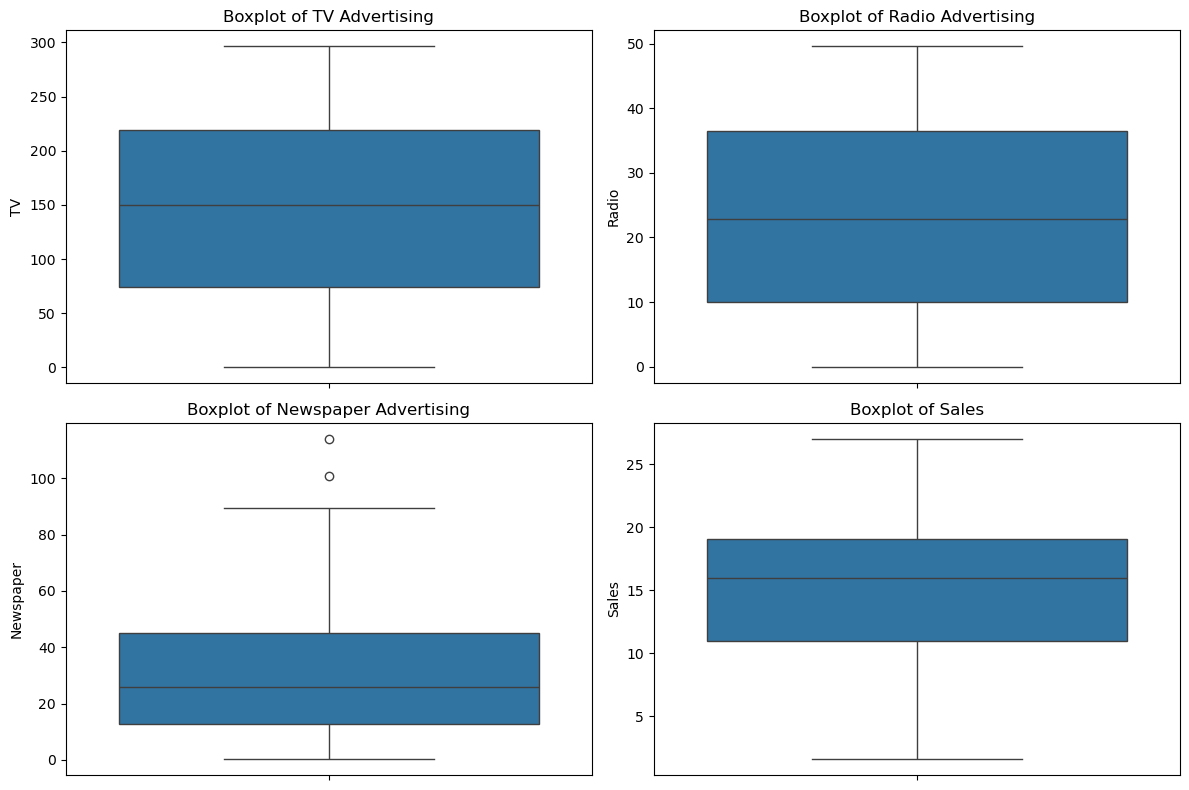

In [8]:
# Box Plots:
# To identify outliers and understand the spread of the data.

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.boxplot(y=data['TV'])
plt.title('Boxplot of TV Advertising')

plt.subplot(2, 2, 2)
sns.boxplot(y=data['Radio'])
plt.title('Boxplot of Radio Advertising')

plt.subplot(2, 2, 3)
sns.boxplot(y=data['Newspaper'])
plt.title('Boxplot of Newspaper Advertising')

plt.subplot(2, 2, 4)
sns.boxplot(y=data['Sales'])
plt.title('Boxplot of Sales')

plt.tight_layout()
plt.show()


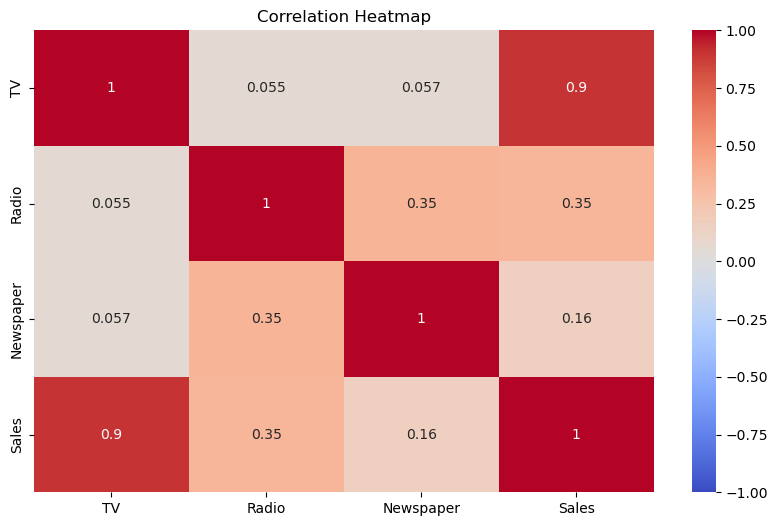

In [9]:
# Correlation Heatmap:
# To see the correlation between different features.

plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


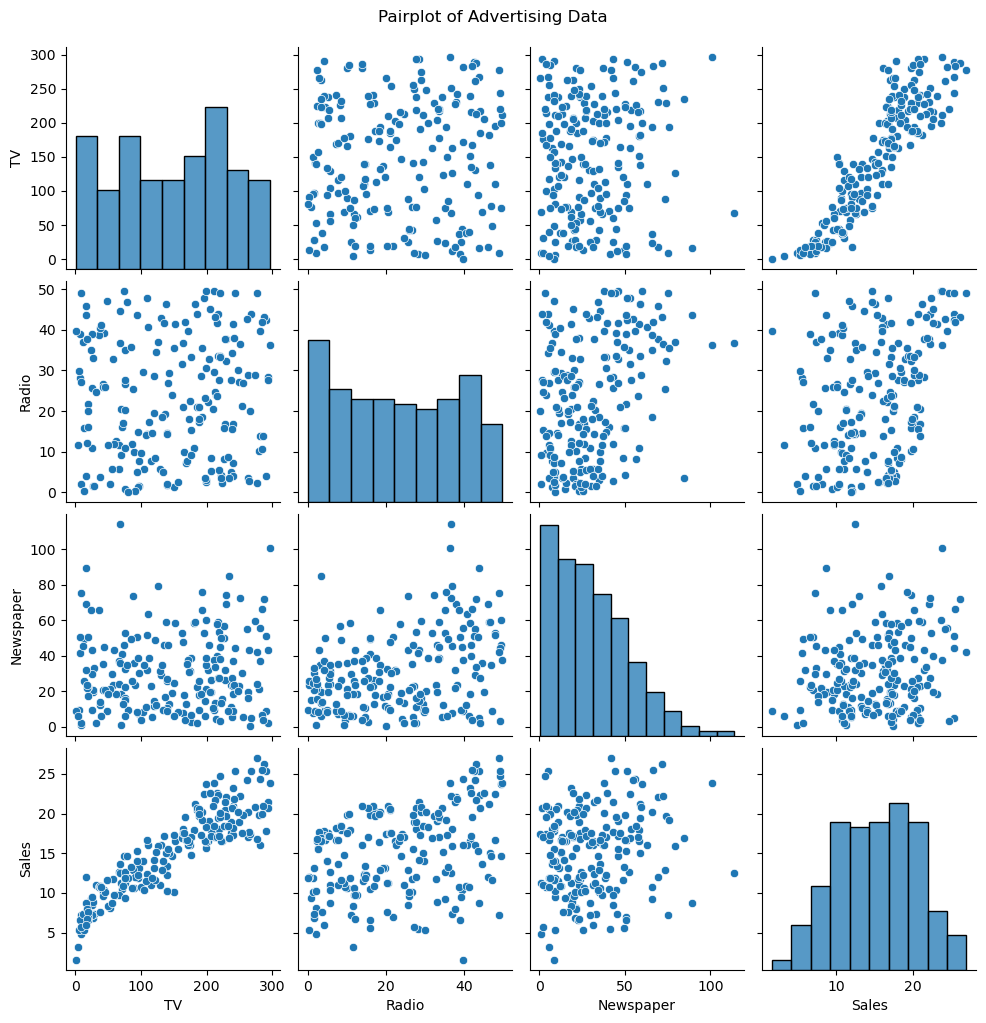

In [10]:
# Pairplot:
# To see pairwise relationships between features and the target variable.

sns.pairplot(data)
plt.suptitle('Pairplot of Advertising Data', y=1.02)
plt.show()


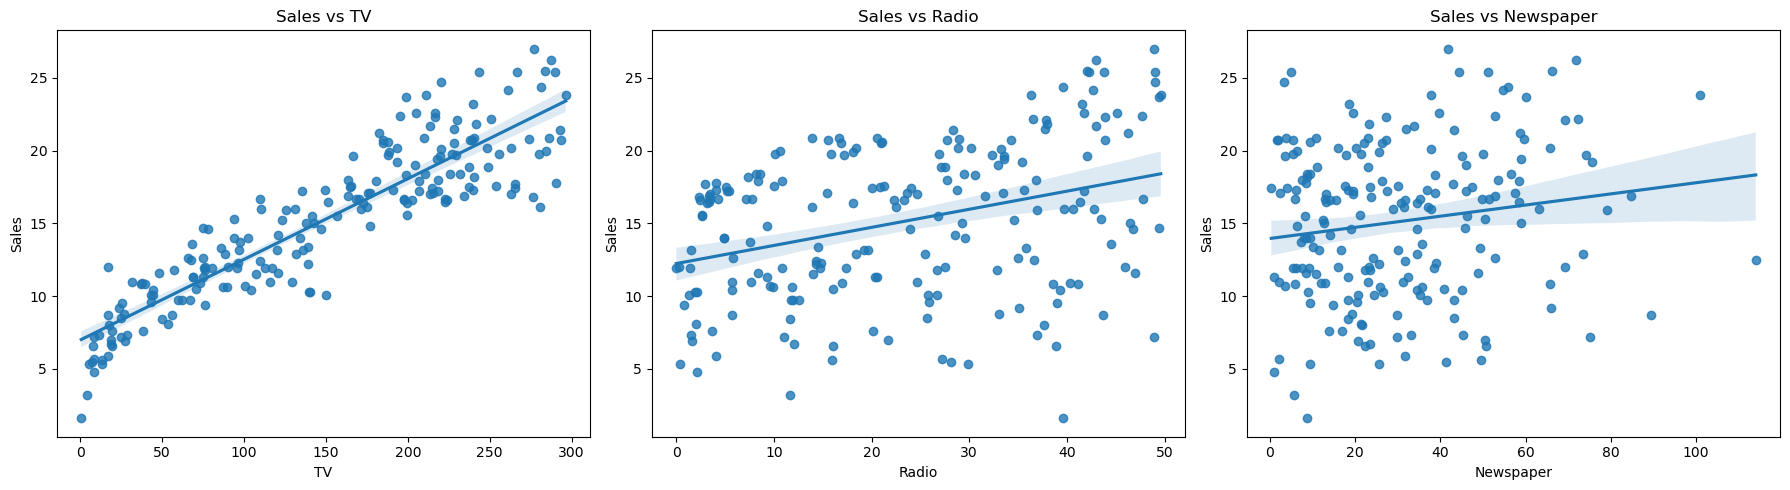

In [11]:
# Scatter Plots with Regression Lines:
# To visualize the relationship between each feature and the target variable.

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.regplot(x='TV', y='Sales', data=data)
plt.title('Sales vs TV')

plt.subplot(1, 3, 2)
sns.regplot(x='Radio', y='Sales', data=data)
plt.title('Sales vs Radio')

plt.subplot(1, 3, 3)
sns.regplot(x='Newspaper', y='Sales', data=data)
plt.title('Sales vs Newspaper')

plt.tight_layout()
plt.show()


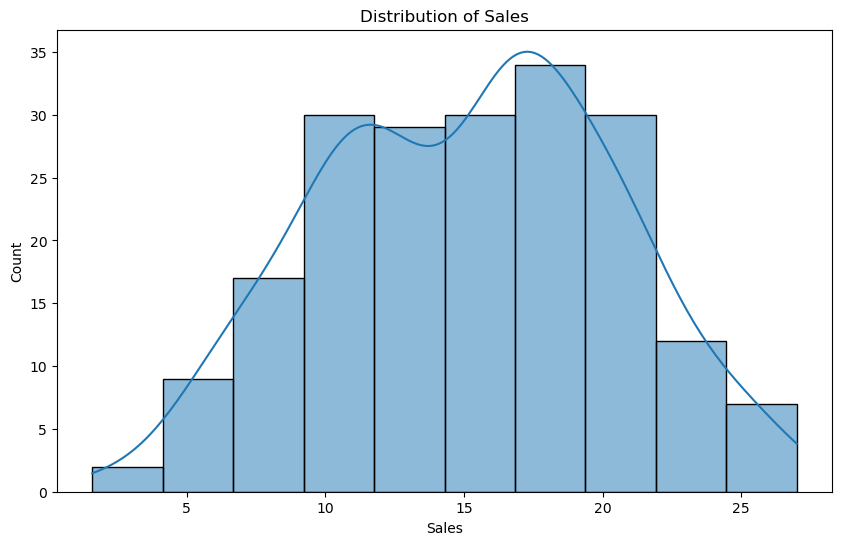

In [12]:
# Distribution Plots:
#  To see the distribution of the target variable Sales.

plt.figure(figsize=(10, 6))
sns.histplot(data['Sales'], kde=True)
plt.title('Distribution of Sales')
plt.show()


## Split the data into features (X) and target (y)

In [13]:
X = data.drop('Sales', axis=1)
y = data['Sales']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Build the Model:

In [15]:
from sklearn.linear_model import LinearRegression
Lr_model = LinearRegression()
Lr_model

LinearRegression()

In [16]:
Lr_model.fit(X_train, y_train)

LinearRegression()

## Evaluate the Model:

In [17]:
y_pred = Lr_model.predict(X_test)
y_pred

array([17.0347724 , 20.40974033, 23.72398873,  9.27278518, 21.68271879,
       12.56940161, 21.08119452,  8.69035045, 17.23701254, 16.66657475,
        8.92396497,  8.4817344 , 18.2075123 ,  8.06750728, 12.64550975,
       14.93162809,  8.12814594, 17.89876565, 11.00880637, 20.47832788,
       20.80631846, 12.59883297, 10.9051829 , 22.38854775,  9.41796094,
        7.92506736, 20.83908497, 13.81520938, 10.77080925,  7.92682509,
       15.95947357, 10.63490851, 20.80292008, 10.43434164, 21.5784752 ,
       21.18364487, 12.12821771, 22.80953262, 12.60992766,  6.46441252])

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 2.907756910271091
R^2 Score: 0.9059011844150826


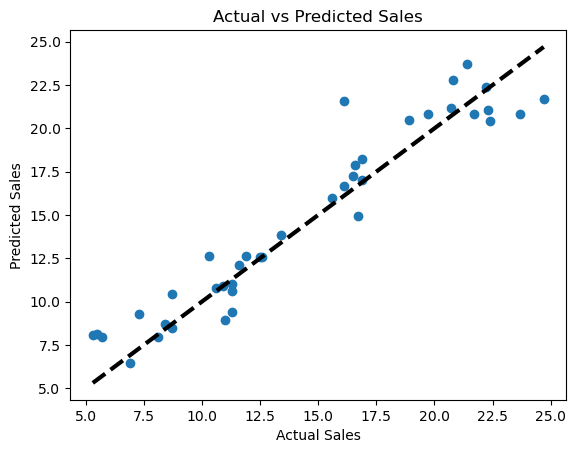

In [19]:
# Visualize predictions

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.show()

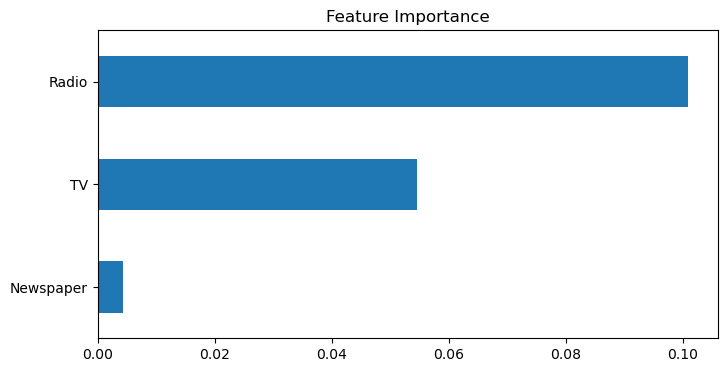

In [20]:
# Feature importance
coef = pd.Series(Lr_model.coef_, index=X.columns)
plt.figure(figsize=(8, 4))
coef.sort_values().plot(kind='barh')
plt.title('Feature Importance')
plt.show()